pro-recsys-movierecommendation-recsys-07/code에 파일 위치

In [ ]:
import numpy as np
import pandas as pd
import os

In [4]:
directors = pd.read_csv('../../data/train/directors.tsv', sep='\t')
genres = pd.read_csv('../../data/train/genres.tsv', sep='\t')
titles = pd.read_csv('../../data/train/titles.tsv', sep='\t')
writers = pd.read_csv('../../data/train/writers.tsv', sep='\t')
years = pd.read_csv('../../data/train/years.tsv', sep='\t')
train_ratings = pd.read_csv('../../data/train/train_ratings.csv', sep=',')

### Train ratings sample 생성 코드

In [8]:

# 1. 고유 유저 ID 추출
unique_users = train_ratings['user'].unique()

# 2. 추출할 유저 수 계산 (20%)
sample_ratio = 0.2
n_sample_users = int(len(unique_users) * sample_ratio)

# 3. 유저 ID 랜덤 추출 (seed 고정)
np.random.seed(42)
sampled_users_id = np.random.choice(unique_users, size=n_sample_users, replace=False)

# 4. 전체 데이터에서 추출된 유저 ID들의 데이터만 필터링
sampled_ratings = train_ratings[train_ratings['user'].isin(sampled_users_id)].copy()

# 5. 파일로 저장
#sampled_ratings.to_csv('data/train/sample_train_ratings.csv', index=False)

In [10]:
sampled_ratings = sampled_ratings.rename(columns={
    'user': 'user_id:token',
    'item': 'movie_id:token',
    'time': 'timestamp:float',
})

In [11]:
sampled_ratings.head()

,user_id:token,movie_id:token,timestamp:float
1050,43,261,1231445317
1051,43,3082,1231445359
1052,43,1962,1231445370
1053,43,2881,1231445381
1054,43,531,1231445386


In [12]:
sampled_ratings.to_csv('sample_train_ratings.inter', sep='\t', index=False)

## Train Data

In [5]:
train_ratings.info()
train_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


### user별 interaction

In [46]:
user_interactions = train_ratings.groupby('user').size()
user_interactions.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
dtype: float64

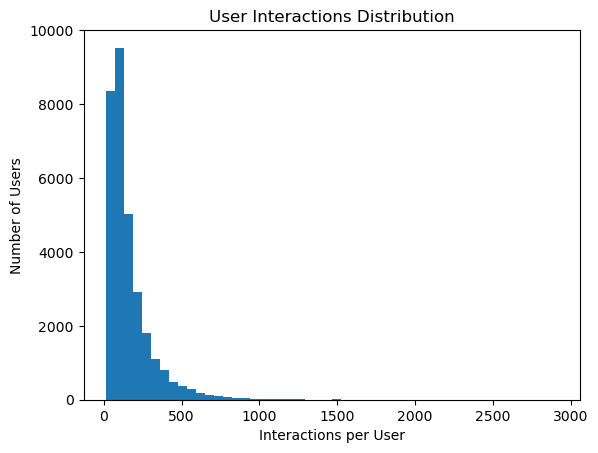

In [52]:
plt.hist(user_interactions, bins=50)
plt.title('User Interactions Distribution')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.show()

### item별 interaction

In [53]:
item_interactions = train_ratings.groupby('item').size()
item_interactions.describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
dtype: float64

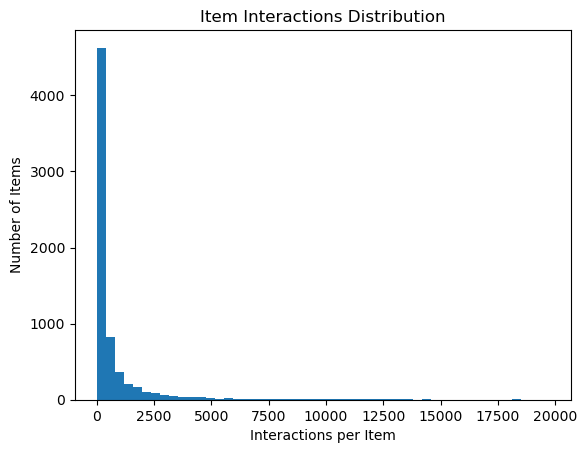

In [54]:
plt.hist(item_interactions, bins=50)
plt.title('Item Interactions Distribution')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.show()

In [5]:
len(sampled_ratings)

1015466

In [18]:
active_user_ids = train_ratings.value_counts('user').index[:10]
popular_movie_ids = train_ratings.value_counts('item').index[:10]

print ("active user ids: ", active_user_ids)
print ("\npopular movie ids: ", popular_movie_ids)

active user ids:  Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122, 118754], dtype='int64', name='user')

popular movie ids:  Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


## Side Information

### Years

In [9]:
years.info()
years.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [13]:
print("Year data shape:", years.shape)
print("Number of unique items in years:", years['item'].nunique())
print("Number of unique years:", years['year'].nunique())
print("\nStatistics of year data: ")
years['year'].describe()

Year data shape: (6799, 2)
Number of unique items in years: 6799
Number of unique years: 93

Statistics of year data: 


count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

In [19]:
year_df = pd.merge(train_ratings, years, on=['item'])
year_id = year_df.value_counts('year').index[:10]

side_df = []
for year in year_id:
    side_df.append(year_df.loc[year_df['year'] == year])

year_top = pd.concat(side_df)

print ("All unique years: \n", np.sort(year_df['year'].unique()))
print ("\nNumber of all unique years: ", year_df['year'].nunique())
print ("\ntop 10 years: \n", year_id)
print ("\nsample of top 10 user-year data: \n", year_top.sample(5))
print ("\nshape of the data: ", year_top.shape)

All unique years: 
 [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Number of all unique years:  93

top 10 years: 
 Index([2004, 1999, 2001, 2002, 2006, 2003, 2000, 2005, 1995, 2007], dtype='int64', name='year')

sample of top 10 user-year data: 
            user   item        time  year
4530823   89012  54281  1269108884  2007
3622239    4076   6383  1200781700  2003
1606450  135595   5066  1349623628  2002
1833677   83949  54503  1197333378  2007
2388164   96750   8665  1251255537  2004

shape of the data:  (2173226, 4)


### Writers

In [15]:
writers.info()
writers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [20]:
writer_df = pd.merge(train_ratings, writers, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df)

print ("Number of all unique writer ids: ", writer_df['writer'].nunique())
print ("\ntop 10 writer ids: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

Number of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
           user   item        time     writer
1687061   1644   6539  1421874238  nm0254645
2925492  23102   5952  1331886905  nm0909638
3673926  22780   7153  1328401507  nm0001392
890003   66894  52281  1340077434  nm0000233
1719550  90157   6539  1212769275  nm0744429

shape of the data:  (651286, 4)


### Titles

In [16]:
titles.info()
titles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


### Genres

In [ ]:
genres.info()
genres.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


### Directors

In [10]:
directors.info()
directors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


## S^3Rec용 item2attributes.json 생성

### 1. sample 속 item_id 추출

In [10]:
import json

# sample 속 item_id 추출
valid_item_ids = sampled_ratings['item'].unique()

print(valid_item_ids)

[ 261 3082 1962 ... 7846 4711 1999]


### 2. Long-tail 분석 및 필터링

In [11]:
def filter_long_tail(df, col_name, attribute_name, coverage_threshold=0.8):
    # 1. sampling된 item만 남기기
    original_len = len(df)
    df = df[df.iloc[:, 0].isin(valid_item_ids)].copy()
    print(f"[{attribute_name}] Sampling 적용: {original_len} -> {len(df)} rows")

    # 2. 빈도수 계산
    counts = df[col_name].value_counts()
    total_occurences = counts.sum()

    # 3. 누적 비율(coverage) 계산
    cumsum = counts.cumsum()
    cumulative_ratio = cumsum / total_occurences

    # 4. Threshold 지점 찾기 (Top-K 결정)
    top_k_values = cumulative_ratio[cumulative_ratio <= coverage_threshold].index

    if len(top_k_values) == 0:
        top_k_values = counts.head(50).index
    
    print(f"--- {attribute_name} Analysis ---")
    print(f"Original Unique Count: {len(counts)}")
    print(f"Selected Top-K Count : {len(top_k_values)} (Coverage: {coverage_threshold*100}%)")
    print(f"Pruned Ratio: {100 - (len(top_k_values)/len(counts)*100):.2f}% of attributes removed.")
    print("--------------------------------\n")

    return set(top_k_values)

### 3. 실제 필터링 실행

In [12]:
# 1. Genres 및 Years: 개수가 적으므로 전부 사용
genres = genres[genres.iloc[:, 0].isin(valid_item_ids)]
years = years[years.iloc[:, 0].isin(valid_item_ids)]

# 2. Directors 및 Writers: Long-Tail 처리 (상위 80% 커버리지)
valid_directors = filter_long_tail(directors, directors.columns[1], 'Director', coverage_threshold=0.8)
valid_writers = filter_long_tail(writers, writers.columns[1], 'Writer', coverage_threshold=0.8)

[Director] Sampling 적용: 5905 -> 5905 rows
--- Director Analysis ---
Original Unique Count: 1340
Selected Top-K Count : 785 (Coverage: 80.0%)
Pruned Ratio: 41.42% of attributes removed.
--------------------------------

[Writer] Sampling 적용: 11306 -> 11306 rows
--- Writer Analysis ---
Original Unique Count: 2989
Selected Top-K Count : 1858 (Coverage: 80.0%)
Pruned Ratio: 37.84% of attributes removed.
--------------------------------



### 4. 통합 ID 매핑 및 JSON 생성

In [14]:
item2attributes = {}
attr_map = {} 
global_id = 1 # 0은 padding용

# Helper: 속성 처리 함수
def process_attribute(df, type_name, valid_set=None):
    global global_id
    
    # 처리 속도를 위해 dict 변환
    # item_id -> list of values
    grouped = df.groupby(df.columns[0])[df.columns[1]].apply(list).to_dict()
    
    for item_id, values in grouped.items():
        item_id_str = str(item_id)
        if item_id_str not in item2attributes:
            item2attributes[item_id_str] = []
            
        for val in values:
            # Pruning 대상인데 유효한 set에 없으면 건너뜀
            if valid_set is not None and val not in valid_set:
                continue
            
            # ID 매핑
            key = (type_name, val)
            if key not in attr_map:
                attr_map[key] = global_id
                global_id += 1
            
            item2attributes[item_id_str].append(attr_map[key])

print("Building item2attributes map...")

# 순서대로 처리 (Genre -> Director -> Writer -> Year)
process_attribute(genres, 'genre') 
process_attribute(directors, 'director', valid_directors)
process_attribute(writers, 'writer', valid_writers)
process_attribute(years, 'year')

print(f"Total Attributes Mapped: {global_id - 1}")

# ==========================================
# 5. 저장
# ==========================================
output_path = 'Ml_sample_item2attributes.json'
with open(output_path, 'w') as f:
    json.dump(item2attributes, f)

print(f"Successfully saved to {output_path}")

# S3Rec의 args.attribute_size에 넣을 값 출력
print(f"Set args.attribute_size = {global_id}")

Building item2attributes map...
Total Attributes Mapped: 2754
Successfully saved to Ml_sample_item2attributes.json
Set args.attribute_size = 2755
